Olá, Reinner!

Meu nome é Ramon. Fico feliz em revisar seu projeto. Ao ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser consertado, caso contrário seu projeto **não** será aceito.
</div>

Você pode me responder usando isso:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>


In [1]:
import pandas as pd 
from scipy import stats as st
from scipy.stats import levene
import plotly.express
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## 1. Preparação dos Dados

In [2]:
#lendo o arquivo da base de dados
games_data = pd.read_csv('/datasets/games.csv')

print(games_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


A maior parte dos dados faltantes está relacionada a classificação. Colunas: critic_score, user_score e rating. logo não afeta os volumes de venda.

In [3]:
print(games_data.head())

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


Vamos converter a coluna `User_Score` para float

In [4]:
#utilizar o parâmetro 'coerce' para quando converter valores não numéricos (NaN) não dar erro e sim converter para NaN
games_data['User_Score'] = pd.to_numeric(games_data['User_Score'], errors='coerce')

print(games_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       7590 non-null   float64
 10  Rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB
None


Padronizar os nomes das colunas para o formato snake_case

In [5]:
games_data.columns = games_data.columns.str.lower()
print(games_data)

                                name platform  year_of_release         genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       na_sales  eu_sales  jp_sales  ot

In [6]:
#Verificar se temos linhas duplicatas
print(games_data[games_data.duplicated()])


Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []


Não temos linhas duplicadas

In [7]:
#Utilizando feature Engineering para criar a coluna total_sales
games_data['total_sales'] = games_data['na_sales'] + games_data['eu_sales'] + games_data['jp_sales'] + games_data['other_sales']
print(games_data.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1      3.58      6.81         0.77           NaN         NaN    NaN   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
4      8.89     10.22         1.00           NaN         NaN    NaN   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4

Analisar se tem algum ano específico, plataforma que mais tem dados faltantes

In [8]:
user_NaN = games_data[games_data['user_score'].isna()]
print(user_NaN.groupby(by='year_of_release').count().sort_values(by='name', ascending=False))

                 name  platform  genre  na_sales  eu_sales  jp_sales  \
year_of_release                                                        
2009.0            812       812    812       812       812       812   
2010.0            788       788    788       788       788       788   
2008.0            766       766    766       766       766       766   
2011.0            635       635    635       635       635       635   
2007.0            568       568    568       568       568       568   
2006.0            454       454    454       454       454       454   
2002.0            365       365    365       365       365       365   
2005.0            356       356    356       356       356       356   
1998.0            348       348    348       348       348       348   
2012.0            314       314    314       314       314       314   
2015.0            309       309    309       309       309       309   
1999.0            307       307    307       307       307      

Todos os anos tem dados faltante, mas os anos mais recentes tem mais dados faltantes

In [9]:
print(user_NaN.groupby(by='platform').count().sort_values(by='name', ascending=False))

          name  year_of_release  genre  na_sales  eu_sales  jp_sales  \
platform                                                               
DS        1635             1609   1635      1635      1635      1635   
PS        1035             1031   1035      1035      1035      1035   
PS2        920              907    920       920       920       920   
PSP        788              775    788       788       788       788   
Wii        760              738    760       760       760       760   
GBA        567              560    567       567       567       567   
PS3        454              445    454       454       454       454   
3DS        346              341    346       346       346       346   
N64        319              316    319       319       319       319   
X360       296              287    296       296       296       296   
PSV        287              287    287       287       287       287   
SNES       239              239    239       239       239      

Mesma análise quanto ao ano de lançamento

In [10]:
print(user_NaN.groupby(by='genre').count().sort_values(by='name', ascending=False))

              name  platform  year_of_release  na_sales  eu_sales  jp_sales  \
genre                                                                         
Action        1539      1539             1511      1539      1539      1539   
Misc          1311      1311             1292      1311      1311      1311   
Sports        1245      1245             1225      1245      1245      1245   
Adventure     1003      1003              995      1003      1003      1003   
Role-Playing   755       755              744       755       755       755   
Racing         608       608              597       608       608       608   
Simulation     529       529              518       529       529       529   
Platform       460       460              454       460       460       460   
Puzzle         452       452              444       452       452       452   
Fighting       450       450              442       450       450       450   
Shooter        399       399              391       

Mesma análise

Agora vamos avaliar quanto ao volume de vendas. Se os jogos que não tiveram avaliação são os jogos que tiveram baixo volume de vendas, ou seja, as pessoas já não gostaram e por isso não avaliaram

In [11]:
print(user_NaN[user_NaN['total_sales'] <= 1])

                                name platform  year_of_release       genre  \
2061                 Dead or Alive 2      PS2           2000.0    Fighting   
2062                            1942      NES           1985.0     Shooter   
2063            Game & Watch Gallery       GB           1997.0        Misc   
2064                   Excitebike 64      N64           2000.0      Racing   
2065        NES Open Tournament Golf      NES           1991.0      Sports   
...                              ...      ...              ...         ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0      Action   
16711               LMA Manager 2007     X360           2006.0      Sports   
16712        Haitaka no Psychedelica      PSV           2016.0   Adventure   
16713               Spirits & Spells      GBA           2003.0    Platform   
16714            Winning Post 8 2016      PSV           2016.0  Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score 

Aqui temos um análise importante. Os valores que estão ausentes correspondem aos jogos com menos de 1 MM de vendas total. A questão é: esses jogos não venderam porquê não tiveram avaliação ou não tiveram avaliação porquê não venderam. 

Desta maneira não irei subsituir ou preencher os dados ausentes.

## 2. Agora iremos iniciar a parte de análise de dados.

In [12]:
#agrupando pelo ano de lançamento
#Aplicando o método count() para contar quantos jogos
#Resetando o index
#sorteando em ordem crescente
#aplicando slice para utilziar somente 2 colunas (year of release + 1 ) 
#Renomear para year of release e quantity
games_by_year = games_data.groupby(by='year_of_release').count().reset_index().sort_values(by='year_of_release',ascending=True)
games_by_year = games_by_year[['year_of_release', 'name']]
games_by_year.rename(columns={'name':'quantity'}, inplace=True)
print(games_by_year)

    year_of_release  quantity
0            1980.0         9
1            1981.0        46
2            1982.0        36
3            1983.0        17
4            1984.0        14
5            1985.0        14
6            1986.0        21
7            1987.0        16
8            1988.0        15
9            1989.0        17
10           1990.0        16
11           1991.0        41
12           1992.0        43
13           1993.0        60
14           1994.0       121
15           1995.0       219
16           1996.0       263
17           1997.0       289
18           1998.0       379
19           1999.0       338
20           2000.0       350
21           2001.0       482
22           2002.0       829
23           2003.0       775
24           2004.0       762
25           2005.0       939
26           2006.0      1006
27           2007.0      1197
28           2008.0      1427
29           2009.0      1426
30           2010.0      1255
31           2011.0      1136
32        

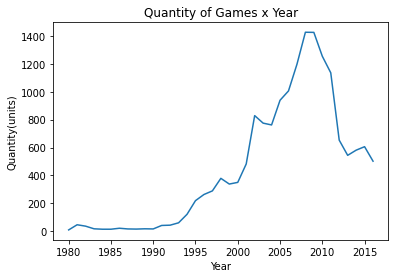

In [13]:
games_by_year.plot(x='year_of_release', y='quantity', legend=False,title='Quantity of Games x Year', ylabel='Quantity(units)', xlabel='Year');

É possível ver a curva de lançamento, desta maneira percebe-se que entre  `2000 e 2009` foi houve o bum de lançamento de jogos

In [14]:
top_games = games_data[(games_data['year_of_release'] >= 2000) & (games_data['year_of_release'] <= 2009)]

print(top_games.sort_values(by='total_sales', ascending=False).head())

                    name platform  year_of_release     genre  na_sales  \
0             Wii Sports      Wii           2006.0    Sports     41.36   
2         Mario Kart Wii      Wii           2008.0    Racing     15.68   
3      Wii Sports Resort      Wii           2009.0    Sports     15.61   
6  New Super Mario Bros.       DS           2006.0  Platform     11.28   
7               Wii Play      Wii           2006.0      Misc     13.96   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
6      9.14      6.50         2.88          89.0         8.5      E   
7      9.18      2.93         2.84          58.0         6.6      E   

   total_sales  
0        82.54  
2        35.52  
3        32.77  
6        29.80  
7        28.91  


O jogo que mais vendeu nesse período foi `Wii Sports` da plataforma `Wii`. Mesmo vendeu `$82.54` MM de dólares

Vamos comparar os jogos que mais venderam de todos os tempos

In [15]:
print(games_data.sort_values(by='total_sales', ascending=False).head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1      3.58      6.81         0.77           NaN         NaN    NaN   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
4      8.89     10.22         1.00           NaN         NaN    NaN   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4

É possível perceber que temos apenas 2 jogos que estão fora do período de maior volume de lançamentos: `Super Mario Bros.` e `Pokemon Red/Pokemon Blue`. São jogos de 1985 e 1996, respectivamente.

Vamos analisar as vendas por plataforma. Total de vendas por plataforma.

In [16]:
salesby_platform = games_data.groupby(by='platform')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)
salesby_platform_filtered = salesby_platform[salesby_platform['total_sales'] >= 700]
print(salesby_platform_filtered)

   platform  total_sales
16      PS2      1255.77
28     X360       971.42
17      PS3       939.65
26      Wii       907.51
4        DS       806.12
15       PS       730.86


Utilizei somente valores acima de $700MM devido ao primeiro valor abaixo disto ser menos da metade.

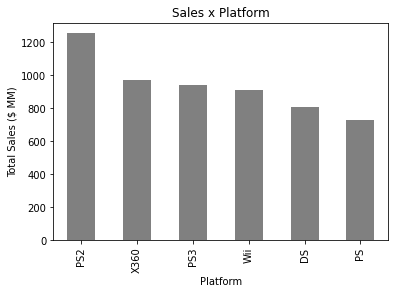

In [17]:
salesby_platform_filtered.plot(kind='bar', y='total_sales', x='platform', legend=False, xlabel='Platform', ylabel='Total Sales ($ MM)', title='Sales x Platform', color='gray')
plt.show()

- Apesar da plataforma Wii ter os jogos que mais venderam individualmente a mesma é apenas a quarta colocada em volume total de vendas. 
- A plataforma com o maior volume de vendas é o PS2

In [18]:
#filtrando somente as plataformas com maior venda
salesby_platform_year =  games_data.groupby(by=['platform', 'year_of_release'])['total_sales'].sum().reset_index().sort_values(by='platform', ascending=False)
platform = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
salesby_platform_year_filtered = salesby_platform_year[salesby_platform_year['platform'].isin(platform)]
print(salesby_platform_year_filtered)

    platform  year_of_release  total_sales
218     X360           2010.0       170.03
213     X360           2005.0         8.25
214     X360           2006.0        51.62
215     X360           2007.0        95.41
216     X360           2008.0       135.26
..       ...              ...          ...
33        DS           2011.0        26.18
31        DS           2009.0       119.54
34        DS           2012.0        11.01
35        DS           2013.0         1.54
32        DS           2010.0        85.02

[67 rows x 3 columns]


    platform  year_of_release  total_sales
25        DS           1985.0         0.02
120       PS           1994.0         6.03
121       PS           1995.0        35.96
122       PS           1996.0        94.70
123       PS           1997.0       136.17
..       ...              ...          ...
206      Wii           2015.0         1.14
223     X360           2015.0        11.96
224     X360           2016.0         1.52
207      Wii           2016.0         0.18
152      PS3           2016.0         3.60

[67 rows x 3 columns]


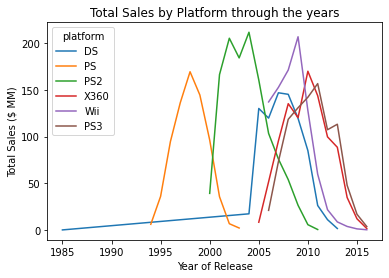

In [19]:
#plotar o gráfico de vendas das plataformas ao longo dos anos
#Para isso será necessário ordenar por year
salesby_platform_year_filtered = salesby_platform_year_filtered.sort_values(by='year_of_release')

print(salesby_platform_year_filtered)

sns.lineplot(x='year_of_release', y='total_sales', hue='platform', data=salesby_platform_year_filtered)
plt.xlabel('Year of Release')
plt.ylabel('Total Sales ($ MM)')
plt.title('Total Sales by Platform through the years')
plt.show()

- O reinado do PS1 (PS) foi o mais longo ,quase 10 anos.
- Na sequência com o lançamento do PS2 as vendas do PS1 pararam e deram lugar ao reinado do PS2, que já foi mais curto, aproximadamente 6 anos. 
- Depois temos um perído que a briga ficou acirrada com as outras 4 plataformas (DS, X360, Wii e PS3) sendo lançadas juntas.Onde todas occuparam por um curto período a liderança de vendas.
- Atualmente não temos mais vendas de PS1, PS2 e DS

Com base nesses dados iremos considerar somente informações a partir do ano 2000

In [20]:
games_data_filtered = games_data[games_data['year_of_release'] >= 2000]
print(games_data_filtered.head())

                    name platform  year_of_release     genre  na_sales  \
0             Wii Sports      Wii           2006.0    Sports     41.36   
2         Mario Kart Wii      Wii           2008.0    Racing     15.68   
3      Wii Sports Resort      Wii           2009.0    Sports     15.61   
6  New Super Mario Bros.       DS           2006.0  Platform     11.28   
7               Wii Play      Wii           2006.0      Misc     13.96   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
6      9.14      6.50         2.88          89.0         8.5      E   
7      9.18      2.93         2.84          58.0         6.6      E   

   total_sales  
0        82.54  
2        35.52  
3        32.77  
6        29.80  
7        28.91  


Agora iremos analisar os dados da atulidade, após 2013 e avaliar quais plataformas ainda estão vendendo

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O ideal é recortar dentro 2-3 anos para prever vendas.
</div>

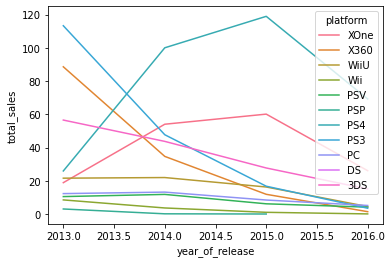

In [21]:
salesby_platform_year_filtered_2 = salesby_platform_year[salesby_platform_year['year_of_release'] >= 2013]
sns.lineplot(x='year_of_release', y='total_sales', hue='platform', data=salesby_platform_year_filtered_2)
plt.show()


Agora podemos ver que as plataformas PS4 e XOne são as que estão vendendo na atualidade

In [22]:
#Filtrando somente os jogos acima de 2010
#Agrupando por plataforma
games_data_filtered2010 = games_data[games_data['year_of_release'] >= 2013]
salesby_platform_filtered2010 = games_data_filtered2010.groupby(by='platform')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)
print(salesby_platform_filtered2010)

   platform  total_sales
4       PS4       314.14
3       PS3       181.43
10     XOne       159.32
0       3DS       143.25
9      X360       136.80
8      WiiU        64.63
2        PC        39.43
6       PSV        32.99
7       Wii        13.66
5       PSP         3.50
1        DS         1.54


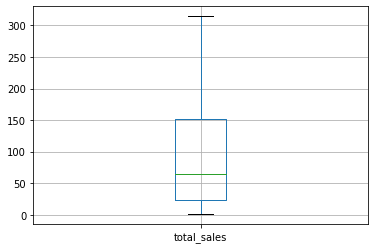

In [23]:
#Avaliando as vendas por plataforma através de box plot
salesby_platform_filtered2010.boxplot(column='total_sales');

In [24]:
#Cálculo da média de vendas por plataforma
print(salesby_platform_filtered2010['total_sales'].mean())


99.15363636363631


- A mediana de vendas por plataforma é de $60MM
- E a média é de $99MM puxada para cima devido valores elevados (máximo = $310M)
- 75% dos jogos tiveram vendas < $150MM

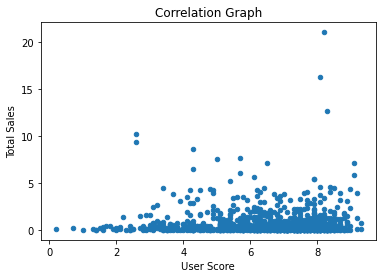

In [25]:
games_data_filtered2010.plot(kind='scatter', y='total_sales', x='user_score', xlabel='User Score', ylabel='Total Sales', title='Correlation Graph')
plt.show()

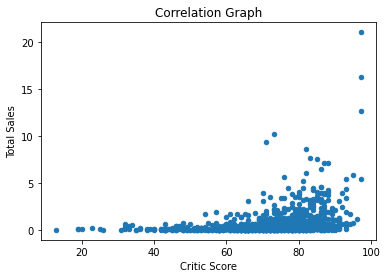

In [26]:
games_data_filtered2010.plot(kind='scatter', y='total_sales', x='critic_score', xlabel='Critic Score', ylabel='Total Sales', title='Correlation Graph')
plt.show()


In [27]:
corr1 = games_data_filtered2010['total_sales'].corr(games_data_filtered2010['user_score'])
corr2 = games_data_filtered2010['total_sales'].corr(games_data_filtered2010['critic_score'])

print(f"A correlação entre o total de vendas e a avaliação dos usuários é de {corr1}:")
print(f"A correlação entre o total de vendas e a avaliação dos críticos é de {corr2}:")

A correlação entre o total de vendas e a avaliação dos usuários é de -0.0026078133545982727:
A correlação entre o total de vendas e a avaliação dos críticos é de 0.3136995151027369:


- A correlação entre as vendas e avaliação é fraca. 
- A maior correlação ocorre entre o total de vendas e a avaliação dos críticos

Vamos comparar a venda dos jogos em diferentes plataformas e é possível observar que `GTA V` e `COD` estão presente como jogos mais vendidos em diversas plataformas.

In [28]:
gamesby_name = games_data_filtered2010.groupby(by=['name','platform'])['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)
print(gamesby_name.head(10))

                                           name platform  total_sales
748                          Grand Theft Auto V      PS3        21.05
750                          Grand Theft Auto V     X360        16.27
254                   Call of Duty: Black Ops 3      PS4        14.63
1402                        Pokemon X/Pokemon Y      3DS        14.60
749                          Grand Theft Auto V      PS4        12.62
1398  Pokemon Omega Ruby/Pokemon Alpha Sapphire      3DS        11.68
261                        Call of Duty: Ghosts     X360        10.24
258                        Call of Duty: Ghosts      PS3         9.36
1167                                  Minecraft     X360         9.18
606                                     FIFA 16      PS4         8.58


Fazendo o agrupamento por gênero afim de avaliar a quantidade de jogos por categoria.  
O gênero de ação é o gênero com maior número de jogos.  
Será que ele é o gênero com maior volume de vendas?

In [29]:
genre_count = games_data_filtered2010.groupby(by='genre').count().reset_index().sort_values(by='name', ascending=False)[['genre','name']]
genre_count.rename(columns={'name':'count'}, inplace=True)
print(genre_count)
gamesby_genre = games_data_filtered2010.groupby(by='genre')['total_sales'].sum().reset_index().sort_values(by='total_sales',ascending=False)
print()
print(gamesby_genre)



           genre  count
0         Action    766
7   Role-Playing    292
1      Adventure    245
10        Sports    214
8        Shooter    187
3           Misc    155
6         Racing     85
2       Fighting     80
4       Platform     74
9     Simulation     62
11      Strategy     56
5         Puzzle     17

           genre  total_sales
0         Action       321.87
8        Shooter       232.98
10        Sports       150.65
7   Role-Playing       145.89
3           Misc        62.82
4       Platform        42.63
6         Racing        39.89
2       Fighting        35.31
1      Adventure        23.64
9     Simulation        21.76
11      Strategy        10.08
5         Puzzle         3.17


In [30]:
gamesby_genre_count = gamesby_genre.merge(genre_count)
print()
print(gamesby_genre_count)



           genre  total_sales  count
0         Action       321.87    766
1        Shooter       232.98    187
2         Sports       150.65    214
3   Role-Playing       145.89    292
4           Misc        62.82    155
5       Platform        42.63     74
6         Racing        39.89     85
7       Fighting        35.31     80
8      Adventure        23.64    245
9     Simulation        21.76     62
10      Strategy        10.08     56
11        Puzzle         3.17     17


<s><div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Erro no código. Veja abaixo o tipo das colunas para você entender o erro.
</div>

In [31]:
gamesby_genre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 5
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   genre        12 non-null     object 
 1   total_sales  12 non-null     float64
dtypes: float64(1), object(1)
memory usage: 288.0+ bytes


In [32]:
genre_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 5
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   genre   12 non-null     object
 1   count   12 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes


Ação é o gênero com maior número de jogos e também com a maior receita de vendas.  
Mas esta não é uma premissa para o sucessp: lançar muitos jogos.  
Por exemplo: adventure teve 1300 jogos e está na 10 colocação enquanto Shooter, que tem menos jogos está na segunda.

## 3. Criando perfil por região

#### `Estamos trabalhando somente com os dados após 2013` (games_data_filtered2010)

### 3.1 North America

In [33]:
#definindo as plataforma mais vendidas
platformby_region = games_data_filtered2010.groupby(by='platform')
na_platform = platformby_region['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False)
print(na_platform.head())

   platform  na_sales
4       PS4    108.74
10     XOne     93.12
9      X360     81.66
3       PS3     63.50
0       3DS     38.20


Para NA PS4 é a plataforma com maior volume de vendas

In [34]:
#definindo os gêneros mais vendidos
na_genre = games_data_filtered2010.groupby(by='genre')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False)
print(na_genre.head())

           genre  na_sales
0         Action    126.05
8        Shooter    109.74
10        Sports     65.27
7   Role-Playing     46.40
3           Misc     27.49


O gênero mais vendido é o Action

In [35]:
#definindo o jogo mais vendido
na_game = games_data_filtered2010.sort_values(by='na_sales', ascending=False)[['name', 'na_sales', 'rating']]
print(na_game.head())

                         name  na_sales rating
23         Grand Theft Auto V      9.66      M
16         Grand Theft Auto V      7.02      M
60       Call of Duty: Ghosts      6.73      M
31  Call of Duty: Black Ops 3      6.03    NaN
72                  Minecraft      5.70    NaN


O jogo mais vendido foi o `GTA V` que teve rating `M`. 

###  3.2 União Europeia

In [36]:
#definindo as plataforma mais vendidas
eu_platform = platformby_region['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False)
print(eu_platform.head())

   platform  eu_sales
4       PS4    141.09
3       PS3     67.81
10     XOne     51.59
9      X360     42.52
0       3DS     30.96


Para UE temos a plataforma PS4 em primeiro lugar de vendas

In [37]:
#definindo os gêneros mais vendidos
eu_genre = games_data_filtered2010.groupby(by='genre')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False)
print(eu_genre.head())

           genre  eu_sales
0         Action    118.13
8        Shooter     87.86
10        Sports     60.52
7   Role-Playing     36.97
6         Racing     20.19


O gênero mais vendido também é o de ação

In [38]:
#definindo o jogo mais vendido
eu_game = games_data_filtered2010.sort_values(by='eu_sales', ascending=False)[['name', 'eu_sales', 'rating']]
print(eu_game.head())

                         name  eu_sales rating
16         Grand Theft Auto V      9.09      M
42         Grand Theft Auto V      6.31      M
77                    FIFA 16      6.12      E
31  Call of Duty: Black Ops 3      5.86    NaN
94                    FIFA 17      5.75      E


O jogo mais vendido foi `Grand Theft Auto V`. E a classificação do jogo é `M`

### 3.3 Japão

In [39]:
#definindo as plataforma mais vendidas
jp_platform = platformby_region['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False)
print(jp_platform.head())

  platform  jp_sales
0      3DS     67.81
3      PS3     23.35
6      PSV     18.59
4      PS4     15.96
8     WiiU     10.88


Já no JP a platforma mais vendida é a 3DS

In [40]:
#definindo os gêneros mais vendidos
jp_genre = games_data_filtered2010.groupby(by='genre')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False)
print(jp_genre.head())

          genre  jp_sales
7  Role-Playing     51.04
0        Action     40.49
3          Misc      9.20
2      Fighting      7.65
8       Shooter      6.61


No japão temos o gênero `Role-Playing` como o gênero mais vendido.

In [41]:
#definindo o jogo mais vendido
jp_game = games_data_filtered2010.sort_values(by='jp_sales', ascending=False)[['name', 'jp_sales', 'rating']]
print(jp_game.head())

                                          name  jp_sales rating
33                         Pokemon X/Pokemon Y      4.35    NaN
385                           Monster Hunter 4      3.44    NaN
412                  Yokai Watch 2 Ganso/Honke      3.18    NaN
47   Pokemon Omega Ruby/Pokemon Alpha Sapphire      3.10    NaN
406                           Monster Hunter X      2.79    NaN


No JP os jogos mais vendidos são da franquia Pokemon. A Classificação não importa para a região visto que todos os itens no Top 5 não tem classificação

Com base nessas 3 regiões é possível concluir que para a `EU` e `NA` a classificação importa, logo jogos com classificação `M`` tem maiores volumes de venda.

### 3.4 Avaliando as principais plataformas e sua distribuição por região

In [42]:
platform_distribution = platformby_region[['na_sales', 'eu_sales', 'jp_sales', 'total_sales']].sum().reset_index().sort_values(by='total_sales', ascending=False)
print(platform_distribution.head())

   platform  na_sales  eu_sales  jp_sales  total_sales
4       PS4    108.74    141.09     15.96       314.14
3       PS3     63.50     67.81     23.35       181.43
10     XOne     93.12     51.59      0.34       159.32
0       3DS     38.20     30.96     67.81       143.25
9      X360     81.66     42.52      0.51       136.80


As 5 principais plataformas de todas as regiões são:  
- PS4
- PS3
- XOne
- 3DS
- X360

In [43]:
platform_distribution['na_percent'] = (platform_distribution['na_sales']/platform_distribution['na_sales'].sum())*100
platform_distribution['eu_percent'] = (platform_distribution['eu_sales']/platform_distribution['eu_sales'].sum())*100
platform_distribution['jp_percent'] = (platform_distribution['jp_sales']/platform_distribution['jp_sales'].sum())*100
platform_percent = platform_distribution [['platform', 'na_percent', 'eu_percent', 'jp_percent']]
print(platform_percent.head())


   platform  na_percent  eu_percent  jp_percent
4       PS4   24.842933   35.971241   11.336838
3       PS3   14.507322   17.288326   16.586163
10     XOne   21.274360   13.152997    0.241512
0       3DS    8.727239    7.893328   48.167353
9      X360   18.656188   10.840578    0.362267


Conclusão:  
- PS4 representa a maior quota dentro do mercado EU e NA
- XOne é o segundo no NA, mas não tem participação no JP
- 3DS no JP é lider absoluto com quase 50% das vendas


## 4. Teste de Hipóteses

### 4.1 As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.

In [44]:
#Filtrar por plataforma (XOne e PC)
xone_user_mean = games_data[games_data['platform']=='XOne']
pc_user_mean = games_data[games_data['platform']=='PC']


#### 4.1.1 Definição H0 e Ha  
H0 = As classificações médias dos usuários das plataformas Xbox One e PC são iguais  
Ha = As lassificações médias dos usuários das plataformas Xbox One e PC são diferentes

#### 4.1.2 Escolha do teste e limiar de significância  
alpha = 0.05  
O tipo de teste utilizado será o t-test_ind, pois a classificação das 2 plataformas são independentes  
E iremos verificar se podemos considerar o valor das variâncias iguais através do teste de Levene (uma verificação mais robusta).  
Para isso formularemos a H0L e HaL do teste de levene:
- H0L = Hipótese nula do Teste de Levene (as variâncias são iguais)
- HaL = Hipótese alternativa do Teste de Levene (as variâncias são diferentes)

Se o valor-p (l_value) do teste de levene for menor que alpha a H0L é rejeitada, se for maior não podemos rejeitar H0L



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto. Uma solução mais formal é usaro  teste Levene. O que acha de usar neste projeto?
</div>

#### 4.1.3 Teste de hipótese

Iremos considerar o argumento `nan_policy='omit'`, ou seja, não iremos considerar os valores NaN 

In [45]:
#criar as variáveis que serão usadas para calcular o teste de Levene
varx = xone_user_mean['user_score'].dropna() #variância para xbox one
varp = pc_user_mean['user_score'].dropna() # variância para PC


In [46]:
alpha = 0.05
statistics, l_value = levene(varx, varp)
if l_value > alpha:
    result1 = st.ttest_ind(xone_user_mean['user_score'], pc_user_mean['user_score'], nan_policy='omit')
    print('valor-p', result1.pvalue)
    if result1.pvalue < alpha:
        print('A hipótese nula deve ser rejeitada')
    else:
        print('A hipótese nula não deve ser rejeitada')
else:
    result1 = st.ttest_ind(xone_user_mean['user_score'], pc_user_mean['user_score'], equal_var=False, nan_policy='omit')
    print('valor-p', result1.pvalue)
    if result1.pvalue < alpha:
        print('A hipótese nula deve ser rejeitada')
    else:
        print('A hipótese nula não deve ser rejeitada')




valor-p 1.3896435533548819e-05
A hipótese nula deve ser rejeitada


Embora os valores sejam diferentes a probabilidade de eles ocorrerem de maneira aleatória é muito baixa

### 4.2  As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.

In [47]:
#Filtrar pelos gêneros Action e Sports
action_games = games_data[games_data['genre']=='Action']
sports_games = games_data[games_data['genre']=='Sports']

#### 4.2.1 Definição H0 e Ha  
H0 = As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são iguais.  
Ha = As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.

#### 4.2.2 Escolha do teste e limiar de significância  
alpha = 0.05  
O tipo de teste utilizado será o t-test_ind, pois a classificação das 2 plataformas são independentes  
E iremos verificar se podemos considerar o valor das variâncias iguais através do teste de Levene (uma verificação mais robusta).  
Para isso formularemos a H0L e HaL do teste de levene:
- H0L = Hipótese nula do Teste de Levene (as variâncias são iguais)
- HaL = Hipótese alternativa do Teste de Levene (as variâncias são diferentes)

Se o valor-p (l_value2) do teste de levene for menor que alpha a H0L é rejeitada, se for maior não podemos rejeitar H0L

#### 4.2.3 Teste de hipótese

Iremos considerar o argumento `nan_policy='omit'` para que os valores NaN não sejam considerados

In [48]:
#criar as variáveis que serão usadas para o teste Levene
vara = action_games['user_score'].dropna() #variância para Action
vars = sports_games['user_score'].dropna() # variância para Sports

In [49]:
alpha = 0.05
statistic2, l_value2 = levene(vara,vars)
if l_value2 > alpha:
    result2 = st.ttest_ind(action_games['user_score'], sports_games['user_score'], nan_policy='omit')
    print('valor-p', result2.pvalue)
    if result2.pvalue < alpha:
        print('A hipótese nula deve ser rejeitada')
    else:
        print('A hipótese nula não deve ser rejeitada')
else:
    result2 = st.ttest_ind(action_games['user_score'], sports_games['user_score'], equal_var=False, nan_policy='omit')
    print('valor-p', result2.pvalue)
    if result2.pvalue < alpha:
        print('A hipótese nula deve ser rejeitada')
    else:
        print('A hipótese nula não deve ser rejeitada')


valor-p 0.11483818791498648
A hipótese nula não deve ser rejeitada


Embora os valores sejam diferentes temos uma alta probabilidade, `11.48%` de ocorrer de maneira aleatória

## 5. Conclusão

- Feito EDA: avaliado duplicados, ausentes, corrigido formato e colcoado o nome das colunas no padrão de python
- Foram feitos featues engineering com intuito de criar novas colunas que trouxessem mais informações: total_sales, na_percent, eu_percent, jp_percent
- Feito uso de teste de hipóteses para fazer comparação entre plataformas e entre gêneros

Com base nas análises feitas a partir dos dados obtidos podemos ter algumas avaliações:
- o ciclo de uma plataforma é de 6-10 anos
- A classíficação influencia no total de vendas
- A região com maior volume de vendas é a NA
- O gênero é o de Action
- No NA a plataforma com maior volume de vendas é o PS4
- Os gêneros tem similiridade entre NA e EU. Japão tem propriedades particulares


<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Obrigado por enviar seu projeto. 
    
Parabéns, você fez um bom trabalho. No geral, você respondeu corretamente as questões.

Como pontos fortes do projeto, destaco:
- Código simples e eficiente
- Bons gráficos e análises
- Uso de recursos adequados

    
<span class="text-danger">Porém, há espaço para melhorias conforme os itens apontados anteriormente. Destaco os  pontos a seguir: </span>
 * <span class="text-danger"> COrrigir o erro no merge </span>


Portanto, sugiro que você corrija os pontos indicados.
    
Se você tiver alguma dúvida sobre de algo que você não tenha entendido, sinta-se à vontade para perguntar ao tutor ou deixar um comentário para que, na próxima iteração, eu possa responder.

Conte conosco. Lembre-se de que você pode tirar dúvidas comigo usando os comentários ou buscar ajuda de um tutor.
Bom trabalho.
</div>


<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Parabéns pela aprovação. Desejo sucesso na jornada.
</div>